<a href="https://colab.research.google.com/github/HunchJing/word_frequency_count_for_19da/blob/master/fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [5]:
path=untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno=path/'annotations'
path_img=path/'images'

#获取图像，获取所有数组的文件，只显示前5行，Maine_Coon_106名字包含了特征

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_106.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_133.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_67.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_121.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_33.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [14]:
#path_img,fnames 文件列表  pat正则表达式 用于提取特征 size 想要多大的图片 ImageDataBunch 图像数据束对象
data=ImageDataBunch.from_name_re(path_img, fnames , pat, ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Maine_Coon,Bombay,beagle,Sphynx,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,havanese,Bengal,samoyed,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

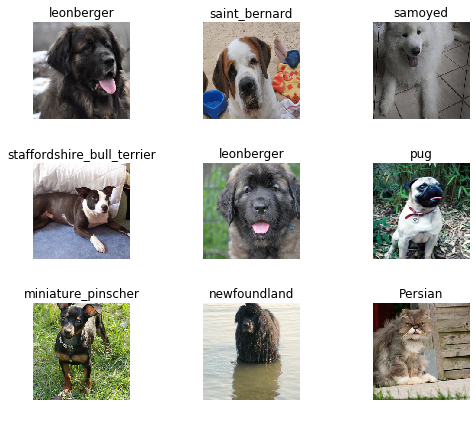

In [15]:
data.show_batch(rows=3,figsize=(7,6))

In [16]:
#打印出37个种类名称 种类个数
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

#训练残差网络34

In [20]:
#训练模型，卷积神经网络学习者，data ,你要使用什么模型 ，指标实际上是公正的：metrics=error_rate 指打印时可以出错 这里原视频用的ConvLearner，可能是版本问题，现在使用 cnn_learner
#使用经过预训练的ResNet34网络
learn=   cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 99208881.84it/s]


In [21]:
#使用fit方法
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.394760,0.348312,0.108254,38:39
1,0.557637,0.242920,0.081191,38:34
2,0.345374,0.222590,0.075778,38:53
3,0.263168,0.209879,0.069689,38:45


In [0]:
#学习参数 ，它会把在同一个模型子目录相关的参数保存
learn.save('stage-1')

#结果

In [0]:
 
  #使用这个分类器进行分类 得到一个对象 分类解释对象
  interp =ClassificationInterpretation.from_learner(learn)

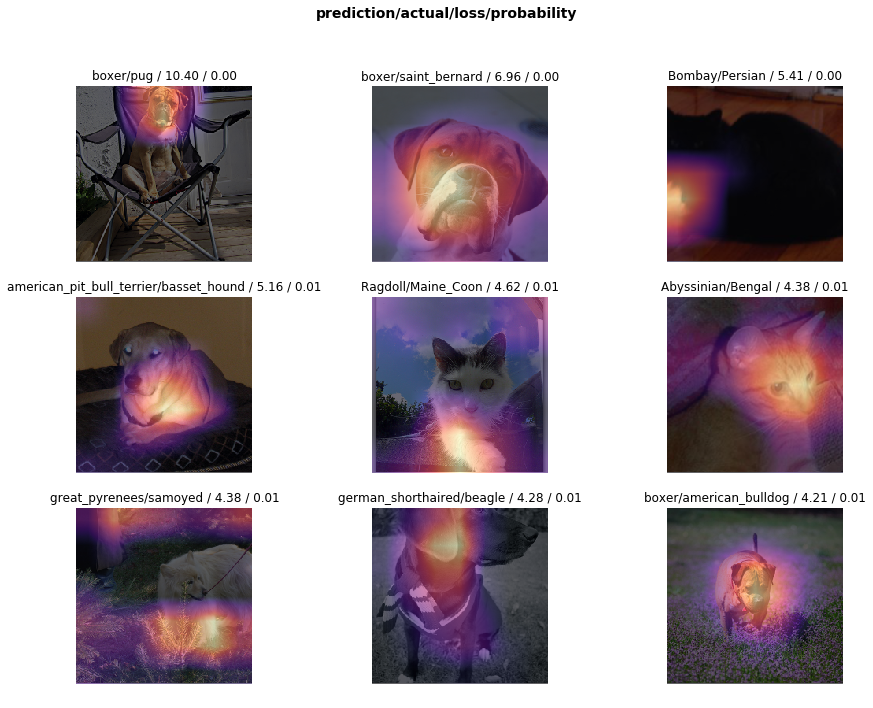

In [24]:
#情节最高损失,找出最错的
interp.plot_top_losses(9,figsize=(15,11))

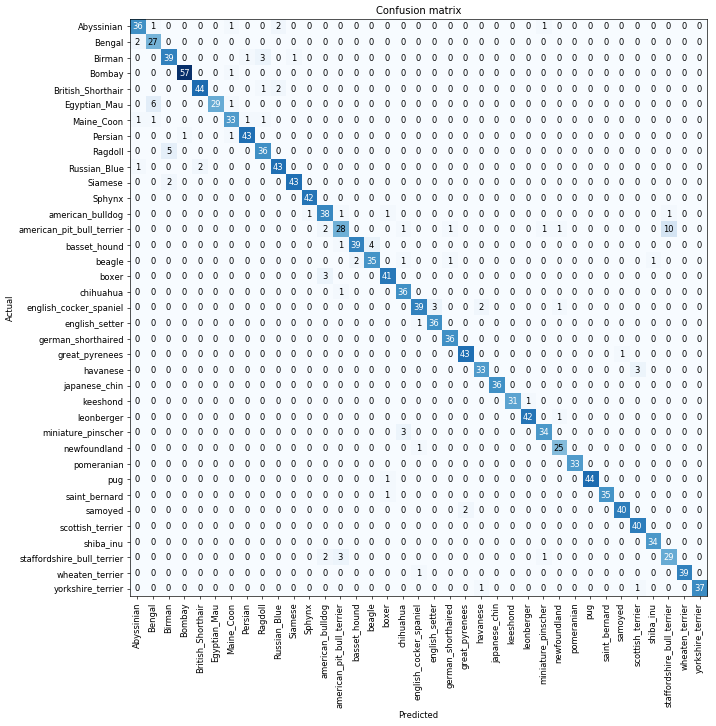

In [28]:
#使用混淆矩阵
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [30]:
#预测过程中最令人困惑的地方 以及预测错误多少次
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Egyptian_Mau', 'Bengal', 6),
 ('Ragdoll', 'Birman', 5),
 ('basset_hound', 'beagle', 4),
 ('Birman', 'Ragdoll', 3),
 ('boxer', 'american_bulldog', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('havanese', 'scottish_terrier', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Bengal', 'Abyssinian', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('beagle', 'basset_hound', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

#模型如期望那样工作，解冻我们的模型并进行更多培训

In [0]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.467592,0.303612,0.091340,54:07


In [38]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Maine_Coon,Bombay,beagle,Sphynx,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,havanese,Bengal,samoyed,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

In [39]:
learn.lr_find()

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken p

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))